In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
players_data=pd.read_excel('players_data.xlsx', sheet_name='Sheet1')
players_data.head()

,player_id,player_name,match_played,team_id,position_name,team_full_name,total_points,season,successful_raids,raid_points,successful_tackles,tackle_points,do_or_die_raid_points,super_raids,super_tackles,super_10s,high_5s
0,2024,Arjun Deshwal,24,3,Raider,Jaipur Pink Panthers,296,Season 9,237,296,0,0,38,7,0,17,0
1,4944,Bharat,23,1,Raider,Bengaluru Bulls,282,Season 9,222,279,3,3,27,11,0,16,0
2,2296,Naveen Kumar,23,2,Raider,Dabang Delhi K.C.,258,Season 9,213,254,3,4,12,3,1,16,0
3,5093,Narender,23,29,Raider,Tamil Thalaivas,249,Season 9,195,243,6,6,40,4,0,15,0
4,143,Maninder Singh,21,4,Raider,Bengal Warriors,240,Season 9,180,238,2,2,19,11,0,14,0


In [3]:
match_data=pd.read_excel('match_data.xlsx', sheet_name='Sheet1')
match_data.head()


,result_code,series_id,event_sub_status,start_date,winning_margin,venue_id,venue_name,game_id,event_name,toss_winner_id,...,team2_raids_done,team2_successful_raids,team2_unsuccessful_raids,team2_empty_raids,team2_tackles_done,team2_successful_tackles,team2_unsuccessful_tackles,team2_all_outs,winning_team_name,winning_team_id
0,W,25,Dabang Delhi K.C. won by 14 Pts,2022-10-07T19:30+05:30,14,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2892,Match 1,2,...,40,13,16,11,26,9,17,0,Dabang Delhi K.C.,2
1,W,25,Bengaluru Bulls won by 5 Pts,2022-10-07T20:30+05:30,5,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2893,Match 2,1,...,40,14,13,13,19,7,12,1,Bengaluru Bulls,1
2,W,25,U.P. Yoddhas won by 2 Pts,2022-10-07T21:30+05:30,2,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2894,Match 3,3,...,39,14,9,16,28,12,16,1,U.P. Yoddhas,30
3,T,25,Match Tied,2022-10-08T19:30+05:30,0,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2895,Match 4,6,...,43,18,11,14,23,8,15,1,Match Tied,0
4,T,25,Match Tied,2022-10-08T20:30+05:30,0,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2896,Match 5,29,...,43,17,6,20,27,8,19,1,Match Tied,0


In [4]:
teams_data=pd.read_excel('teams_data.xlsx', sheet_name='Sheet1')
teams_data.head()

,match_played,team_id,team_name,season,total_points,successful_raids,raid_points,successful_tackles,tackle_points,do_or_die_raid_points,super_raids,super_tackles,total_points_conceded,all_outs_inflicted,all_out_conceded
0,24,3,Jaipur Pink Panthers,Season 9,956,432,519,274,290,70,11,16,758,48,18
1,24,1,Bengaluru Bulls,Season 9,946,440,550,236,254,60,20,18,895,45,36
2,23,2,Dabang Delhi K.C.,Season 9,911,434,542,223,245,59,13,22,926,34,41
3,24,7,Puneri Paltan,Season 9,872,411,507,238,252,80,11,14,808,38,26
4,23,30,U.P. Yoddhas,Season 9,854,384,504,202,224,70,20,22,812,37,29


### Question 1
What is the trend between the total points scored by a player in a season and the tendency to play for the same team in the next season?

In [29]:
df1=players_data[['player_name', 'team_full_name', 'total_points', 'season']].copy()
players=df1['player_name'].unique()
result=pd.DataFrame(index=players, columns=pd.MultiIndex.from_product([np.sort(match_data['season'].unique()), ['Points Scored', 'Retained Next Season']]))
for player in players:
    player_df=df1.loc[df1['player_name']==player]
    seasons=player_df['season'].sort_values()
    for i, season in enumerate(seasons):
        idx=pd.IndexSlice
        result.loc[player, idx[season, 'Points Scored']]=player_df.loc[player_df['season']==season, 'total_points'].iloc[0]
        if i==0:
            continue
        if player_df.loc[player_df['season']==season, 'team_full_name'].iloc[0] != player_df.loc[player_df['season']==seasons.iloc[i-1], 'team_full_name'].iloc[0]:
            result.loc[player, idx[seasons.iloc[i-1], 'Retained Next Season']]=0
        else:
            result.loc[player, idx[seasons.iloc[i-1], 'Retained Next Season']]=1
result
        
    

Season 1                           Season 2  \
                       Points Scored Retained Next Season Points Scored   
Arjun Deshwal                    NaN                  NaN           NaN   
Bharat                           NaN                  NaN           NaN   
Naveen Kumar                     NaN                  NaN           NaN   
Narender                         NaN                  NaN           NaN   
Maninder Singh                   137                    0           NaN   
...                              ...                  ...           ...   
Md. Aruduzzaman Munshi             2                  NaN           NaN   
Farhad Kamal Gharibi               2                  NaN           NaN   
Takamitsu Kono                     2                  NaN           NaN   
Atif Waheed                        1                  NaN           NaN   
Sunil Subhash Lande                1                  NaN           NaN   

                                                 Season 3  \
                       Retained Next Season Points Scored   
Arjun Deshwal                           NaN           NaN   
Bharat                                  NaN           NaN   
Naveen Kumar                            NaN           NaN   
Narender                                NaN           NaN   
Maninder Singh                          NaN           NaN   
...                                     ...           ...   
Md. Aruduzzaman Munshi                  NaN           NaN   
Farhad Kamal Gharibi                    NaN           NaN   
Takamitsu Kono                          NaN           NaN   
Atif Waheed                             NaN           NaN   
Sunil Subhash Lande                     NaN           NaN   

                                                 Season 4  \
                       Retained Next Season Points Scored   
Arjun Deshwal                           NaN           NaN   
Bharat                                  NaN           NaN   
Naveen Kumar                            NaN           NaN   
Narender                                NaN           NaN   
Maninder Singh                          NaN           NaN   
...                                     ...           ...   
Md. Aruduzzaman Munshi                  NaN           NaN   
Farhad Kamal Gharibi                    NaN           NaN   
Takamitsu Kono                          NaN           NaN   
Atif Waheed                             NaN           NaN   
Sunil Subhash Lande                     NaN           NaN   

                                                 Season 5  \
                       Retained Next Season Points Scored   
Arjun Deshwal                           NaN           NaN   
Bharat                                  NaN           NaN   
Naveen Kumar                            NaN           NaN   
Narender                                NaN           NaN   
Maninder Singh                          NaN           192   
...                                     ...           ...   
Md. Aruduzzaman Munshi                  NaN           NaN   
Farhad Kamal Gharibi                    NaN           NaN   
Takamitsu Kono                          NaN           NaN   
Atif Waheed                             NaN           NaN   
Sunil Subhash Lande                     NaN           NaN   

                                                 Season 6  \
                       Retained Next Season Points Scored   
Arjun Deshwal                           NaN             4   
Bharat                                  NaN           NaN   
Naveen Kumar                            NaN           177   
Narender                                NaN           NaN   
Maninder Singh                            1           206   
...                                     ...           ...   
Md. Aruduzzaman Munshi                  NaN           NaN   
Farhad Kamal Gharibi                    NaN           NaN   
Takamitsu Kono                          NaN           NaN   

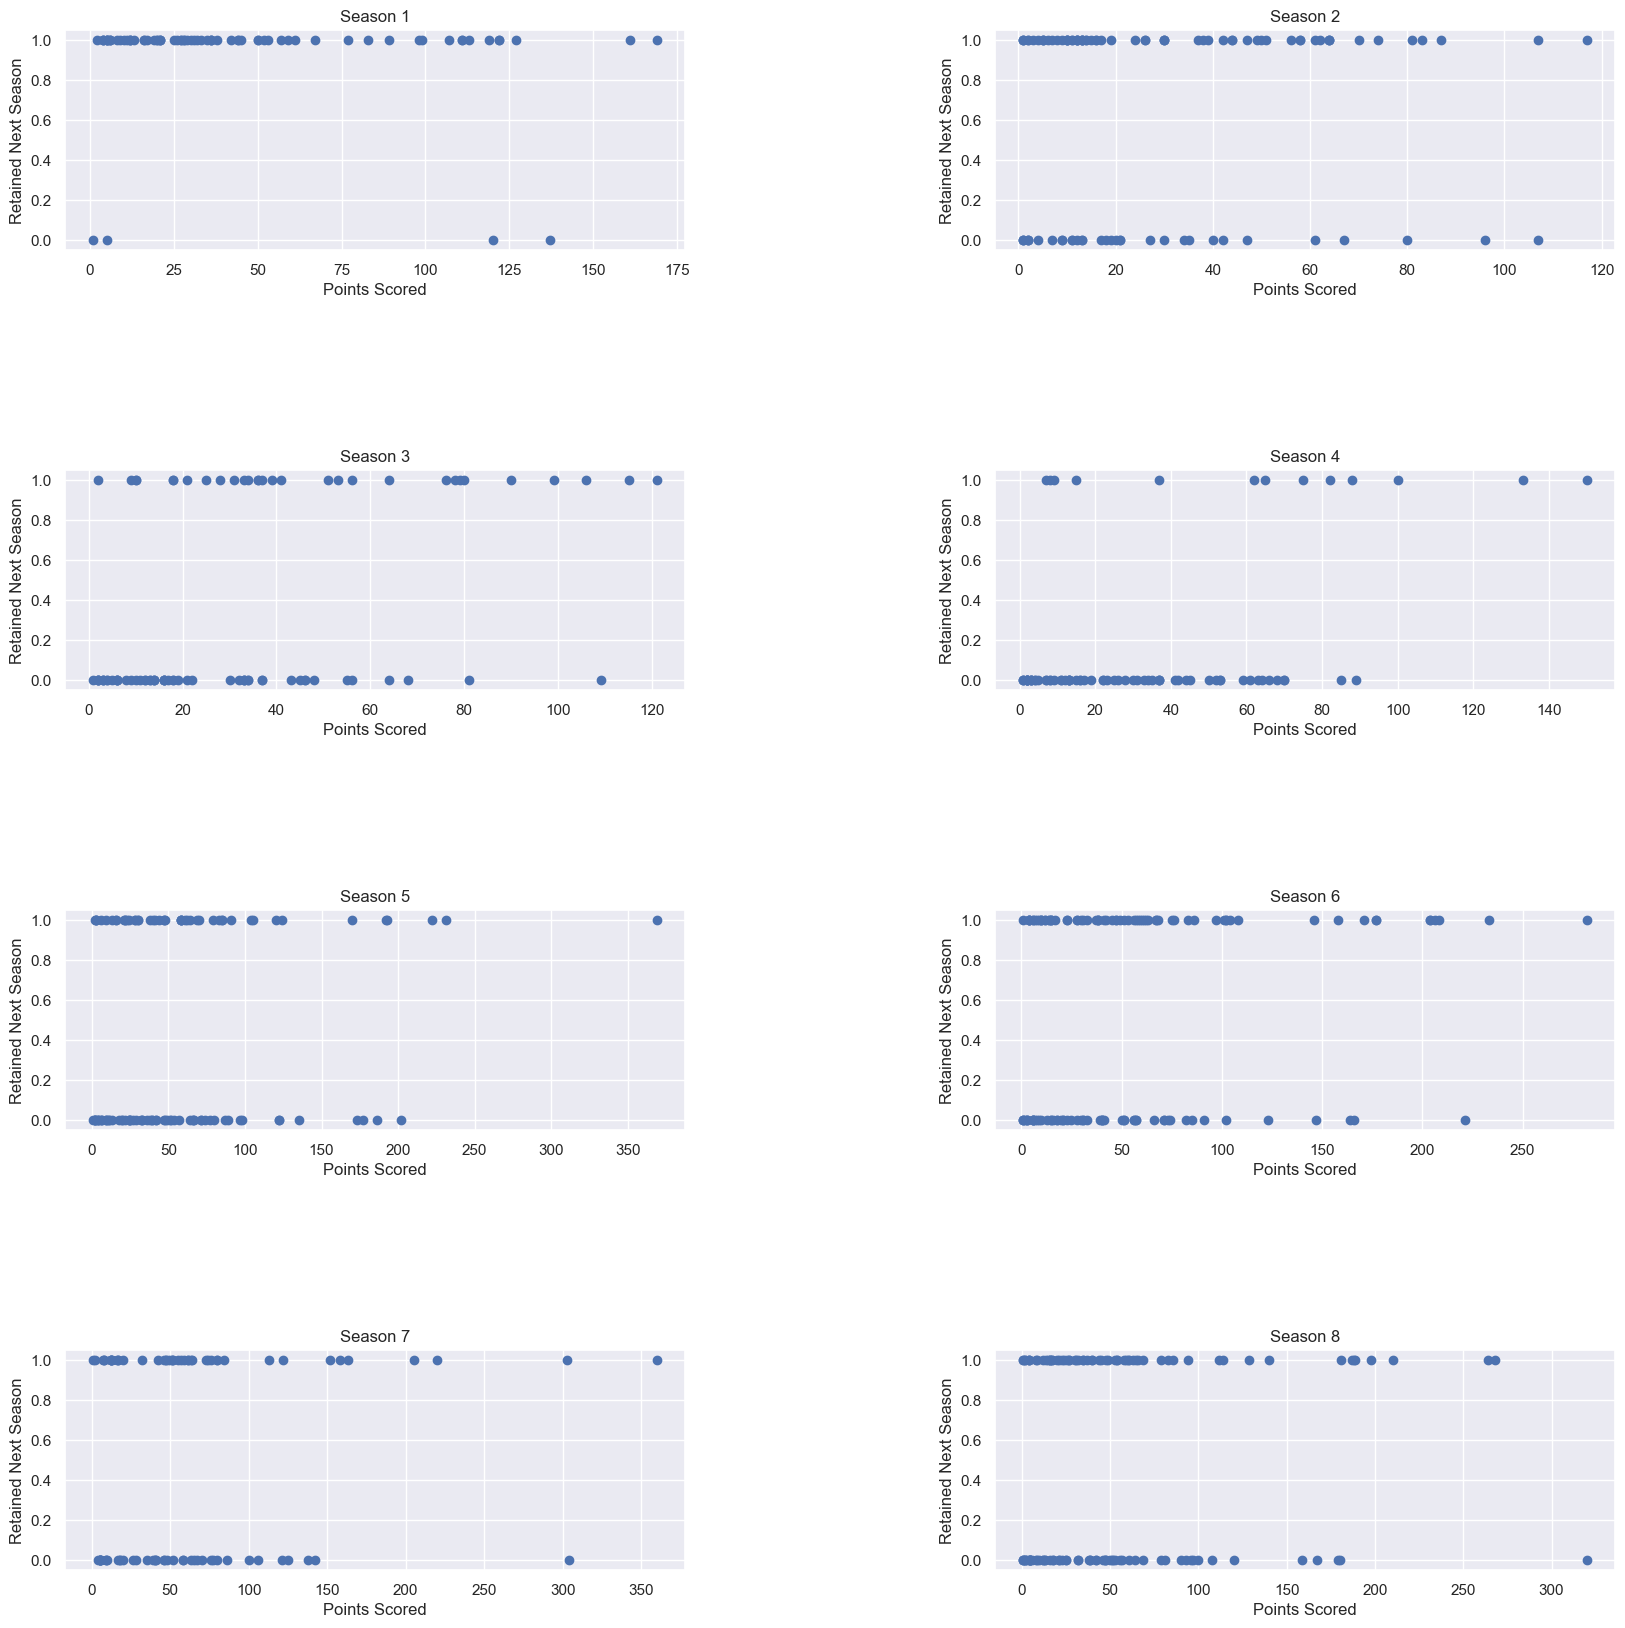

In [49]:
all_seasons=np.sort(match_data['season'].unique())
row=4
col=2
fig, axs=plt.subplots(row, col, gridspec_kw={'hspace': 1, 'wspace': 0.5})
fig.set_size_inches(20, 20)
for i in range(row):
    for j in range(col):
        season=i*2 +j
        axs[i, j].scatter(result[all_seasons[season], 'Points Scored'], result[all_seasons[season], 'Retained Next Season'])
        axs[i, j].set_xlabel('Points Scored')
        axs[i, j].set_ylabel('Retained Next Season')
        axs[i, j].set_title(f'{all_seasons[season]}')


##### Conclusion
This graph shows the relation of total points scored in the season and them being retained in the next season. The x-axis shows the total points scored in each season and the y-axis shows whether the player was retained or not. If the point has y-coordinate as 1 then the player was retained, and if the y-coordinate was 0 then the player was not retained. 

We can see that there does not seem to be any relation between the two features in consideration. This is because there are many instances wherein the player has scored below average points and still retained and vice versa.

### Question 2
Is there a significant difference in win rates between matches played by the home team and away team?

In [5]:
df2=match_data[['team1_name', 'team2_name', 'home_team_name', 'winning_team_name']].copy()
teams=teams_data['team_name'].unique()
result=pd.DataFrame(np.zeros((len(teams), 4)), index=teams, columns=['home_wins', 'home_matches', 'away_wins', 'away_matches'])
def update_result(row):
    team1=row['team1_name']
    team2=row['team2_name']
    winning=row['winning_team_name']
    home=row['home_team_name']
    if home=='None':
        result.loc[team1, 'away_matches']+=1
        result.loc[team2, 'away_matches']+=1
        if team1==winning:
            result.loc[team1, 'away_wins']+=1
        elif team2==winning:
            result.loc[team2, 'away_wins']+=1
    else:
        if team1==home:
            result.loc[team1, 'home_matches']+=1
            result.loc[team2, 'away_matches']+=1
            if team1==winning:
                result.loc[team1, 'home_wins']+=1
            elif team2==winning:
                result.loc[team2, 'away_wins']+=1
        else:
            result.loc[team2, 'home_matches']+=1
            result.loc[team1, 'away_matches']+=1
            if team1==winning:
                result.loc[team1, 'away_wins']+=1
            elif team2==winning:
                result.loc[team2, 'home_wins']+=1
df2.apply(update_result, axis=1)
print('done')

done


In [6]:
result['home_win_rate']=result['home_wins']/result['home_matches']
result['away_win_rate']=result['away_wins']/result['away_matches']
result

,home_wins,home_matches,away_wins,away_matches,home_win_rate,away_win_rate
Jaipur Pink Panthers,29.0,64.0,52.0,108.0,0.453125,0.481481
Bengaluru Bulls,27.0,54.0,59.0,124.0,0.500000,0.475806
Dabang Delhi K.C.,31.0,65.0,39.0,108.0,0.476923,0.361111
Puneri Paltan,27.0,61.0,49.0,114.0,0.442623,0.429825
U.P. Yoddhas,24.0,55.0,30.0,63.0,0.436364,0.476190
Tamil Thalaivas,14.0,47.0,16.0,65.0,0.297872,0.246154
Gujarat Giants,20.0,49.0,40.0,67.0,0.408163,0.597015
Bengal Warriors,33.0,62.0,44.0,111.0,0.532258,0.396396
Haryana Steelers,16.0,47.0,36.0,65.0,0.340426,0.553846
Patna Pirates,31.0,60.0,64.0,120.0,0.516667,0.533333


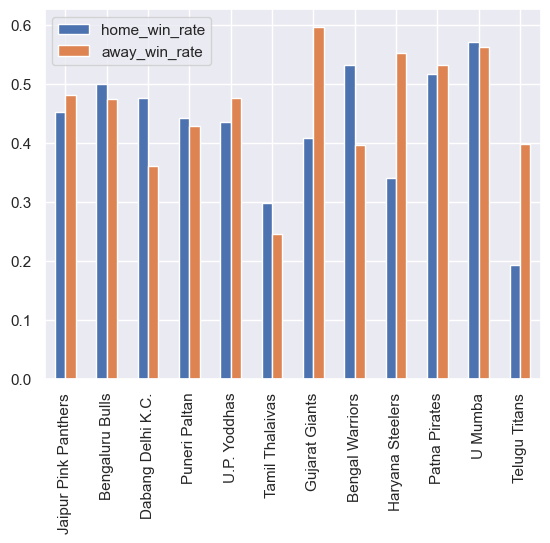

In [10]:
color_dict={'Jaipur Pink Panthers': '#a8329b', 'Bengal Warriors': '#a85f32',
            'Bengaluru Bulls': '#a83232', 'Dabang Delhi K.C.': '#32a6a8',
            'Gujarat Giants': '#000000', 'Haryana Steelers': 'grey', 'Patna Pirates': '#32a83a',
            'Puneri Paltan': '#a87932', 'Tamil Thalaivas': '#a4a832', 'Telugu Titans': '#6532a8',
            'U Mumba': '#a85932', 'U.P. Yoddhas': '#3234a8'}
result[['home_win_rate', 'away_win_rate']].plot.bar();

##### Conclusion
This graph is a double bar graph where the orange bar shows the away win rate and the blue bar shows the home win rate. We expected the home win rate to be higher than the away win rate but we can see that there does not seem to be any significant difference between the two win rates. Most of the teams have equal win rates. But there were some outlier teams like:
Gujurat Giants, Telugu Titans and Haryana Steelers which have significantly high away win rates than the home win rates.

One reason for this might be beacuse of kabaddi being played as an indoor game, and the crowd capacity being comparitively low in order to have a significant impact on the game.

### Question 3
On an average, which team has most players in the top rankings and the trend between them playing the final?

In [127]:
df3=players_data.copy()
seasons=match_data['season'].unique()
stat_type=['raid_points', 'tackle_points']
season_team={}
for season in seasons:
    season_data=df3.loc[df3['season']==season].copy()
    season_df=pd.DataFrame(columns=['team_full_name', 'weight'], dtype=float)
    for stat in stat_type:
        season_data.sort_values(stat_type, inplace=True, ascending=False)
        teams=pd.DataFrame({'team_full_name': season_data.iloc[:10,5], 'weight': range(10,0,-1)})
        season_df=pd.concat([season_df, teams])
    
    values=season_df['team_full_name'].value_counts()
    max_values=values.loc[values==values.max()]
    if len(max_values)==1:
        season_team[season]=max_values.index[0]
    else:
        sums=[]
        for team in max_values.index:
            sums.append(season_df.loc[season_df['team_full_name']==team, 'weight'].sum())
        sums=np.array(sums)
        season_team[season]=max_values.index[sums.argmax()]      

In [129]:
final_dict={'Season 1': ['Jaipur Pink Panthers', 'U Mumba'], 'Season 2': ['U Mumba', 'Bengaluru Bulls'],
            'Season 3': ['Patna Pirates', 'U Mumba'], 'Season 4': ['Jaipur Pink Panthers', 'Patna Pirates'],
            'Season 5': ['Patna Pirates', 'Gujarat Giants'], 'Season 6': ['Bengaluru Bulls', 'Gujarat Giants'],
            'Season 7': ['Bengal Warriors', 'Dabang Delhi K.C.'], 'Season 8': ['Dabang Delhi K.C.', 'Patna Pirates'],
            'Season 9': ['Jaipur Pink Panthers', 'Puneri Paltan']}
result=pd.DataFrame(index=seasons, columns=['best_team_name', 'finalist'])
for key, value in season_team.items():
    result.loc[key, 'best_team_name']=value
    result.loc[key, 'finalist']=int(value in final_dict[key])
result

,best_team_name,finalist
Season 9,Patna Pirates,0
Season 8,U.P. Yoddhas,0
Season 7,Bengaluru Bulls,0
Season 6,Bengaluru Bulls,1
Season 5,Patna Pirates,1
Season 4,Jaipur Pink Panthers,1
Season 3,Patna Pirates,1
Season 2,Bengaluru Bulls,1
Season 1,Jaipur Pink Panthers,1


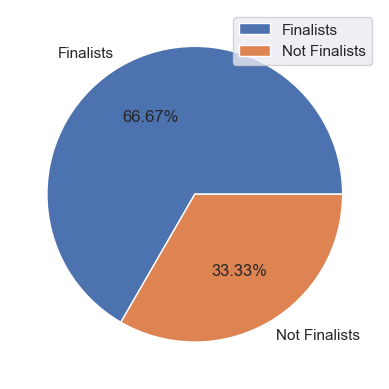

In [130]:
plt.pie(result['finalist'].value_counts(), labels=['Finalists', 'Not Finalists'], 
        autopct='%1.2f%%')
plt.legend(loc='best');

##### Conclusion
We can see from the above graph that 66.67% of the time if a team has had the maximum players in the top rankings, they have also played the final.

However since Season 7, the teams having the maximum players in the top rankings have not played in the final.

### Question 4
Trend between team having the highest average winning margin in a season and it playing the final of that season?

In [131]:
df4=match_data.copy()
idx1=pd.IndexSlice
result=teams_data[['match_played', 'team_name', 'season']].copy()
result['winning_margin']=0
result.set_index(['season', 'team_name'], inplace=True)
seasons=match_data['season'].unique()
for season in seasons:
    seasons_data=df4.loc[df4['season']==season]
    for index, row in seasons_data.iterrows():
        team1=row['team1_name']
        team2=row['team2_name']
        winning=row['winning_team_name']
        if team1==winning:
            result.loc[idx1[season, team1], 'winning_margin']+=row['winning_margin']
            result.loc[idx1[season, team2], 'winning_margin']-=row['winning_margin']
            
        elif team2==winning:
            result.loc[idx1[season, team1], 'winning_margin']-=row['winning_margin']
            result.loc[idx1[season, team2], 'winning_margin']+=row['winning_margin']
            
result['winning_margin']=result['winning_margin']/result['match_played']
result.reset_index(inplace=True)



In [132]:
idx4=result.groupby('season')['winning_margin'].idxmax()
max_margins=result.loc[idx4].copy()
final_dict={'Season 1': ['Jaipur Pink Panthers', 'U Mumba'], 'Season 2': ['U Mumba', 'Bengaluru Bulls'],
            'Season 3': ['Patna Pirates', 'U Mumba'], 'Season 4': ['Jaipur Pink Panthers', 'Patna Pirates'],
            'Season 5': ['Patna Pirates', 'Gujarat Giants'], 'Season 6': ['Bengaluru Bulls', 'Gujarat Giants'],
            'Season 7': ['Bengal Warriors', 'Dabang Delhi K.C.'], 'Season 8': ['Dabang Delhi K.C.', 'Patna Pirates'],
            'Season 9': ['Jaipur Pink Panthers', 'Puneri Paltan']}

max_margins['Finalists']=0
for index, row in max_margins.iterrows():
    if row['team_name'] in final_dict[row['season']]:
        max_margins.loc[index, 'Finalists']=1
max_margins



,season,team_name,match_played,winning_margin,Finalists
84,Season 1,Jaipur Pink Panthers,16,8.187500,1
76,Season 2,Telugu Titans,16,5.750000,0
68,Season 3,Patna Pirates,16,7.875000,1
61,Season 4,Telugu Titans,16,3.750000,0
49,Season 5,Gujarat Giants,24,5.583333,1
38,Season 6,U Mumba,23,8.000000,0
25,Season 7,Bengal Warriors,24,3.250000,1
13,Season 8,Patna Pirates,24,5.416667,1
0,Season 9,Jaipur Pink Panthers,24,8.250000,1


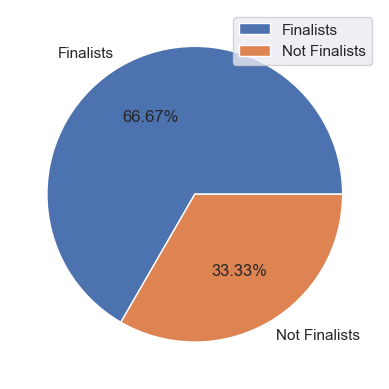

In [133]:
plt.pie(max_margins['Finalists'].value_counts(), labels=['Finalists', 'Not Finalists'], 
        autopct='%1.2f%%')
plt.legend(loc='best');

##### Conclusion
We can see from the above graph that 66.67% of the time if a team has had highest winning margin in a season, they have also played the final.

However since Season 7, the teams having the highest winning rate have played in the final.

### Question 5
Average successful raids and tackles scored by the match winning team in each season?

In [59]:
df5=match_data[['season', 'team1_name', 'team1_successful_raids', 'team1_successful_tackles',
                'team2_name', 'team2_successful_raids', 'team2_successful_tackles', 'winning_team_name']].copy()
seasons=match_data['season'].unique()
result=pd.DataFrame(columns=['average_successful_raids', 'average_successful_tackles'])
for season in seasons:
    matches=0
    raids=0
    tackles=0
    season_data=df5.loc[df5['season']==season]
    for index, row in season_data.iterrows():
        team1=row['team1_name']
        team2=row['team2_name']
        winning=row['winning_team_name']
        if team1==winning:
            matches+=1
            raids+=row['team1_successful_raids']
            tackles+=row['team1_successful_tackles']
        elif team2==winning:
            matches+=1
            raids+=row['team2_successful_raids']
            tackles+=row['team2_successful_tackles']
    result.loc[season]=[raids/matches, tackles/matches]
result


,average_successful_raids,average_successful_tackles
Season 9,17.528000,11.600000
Season 8,17.237288,11.220339
Season 7,16.814516,11.104839
Season 6,16.185484,11.072581
Season 5,15.737705,10.270492
Season 4,13.600000,10.036364
Season 3,14.660714,10.892857
Season 2,13.089286,11.464286
Season 1,17.285714,10.178571


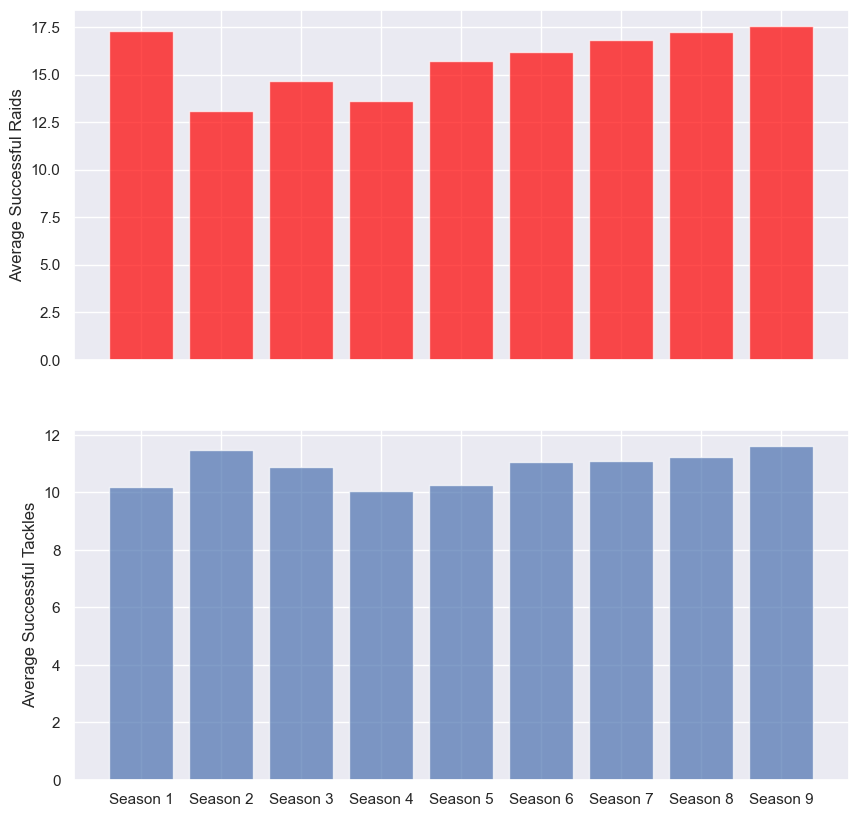

In [80]:
fig, axs=plt.subplots(2, 1, sharex=True)
fig.set_size_inches(10, 10)
axs[0].bar(result.index[::-1], result.average_successful_raids[::-1], color='red', alpha=0.7);
axs[0].set_ylabel('Average Successful Raids')
axs[1].bar(result.index[::-1], result.average_successful_tackles[::-1], alpha=0.7);
axs[1].set_ylabel('Average Successful Tackles');



##### Conclusion
We can see that in each season a match winning team has done :
* 13 to 16 successfull raids
* 10 to 11 successfull tackles

We can also observe that the there is a minimal deviation between corresponsing stats across all seasons.

### Question 6
Are there any fixtures where one team dominates the other?

In [86]:
df5=match_data[['team1_name', 'team2_name', 'winning_team_name']].copy()
teams=teams_data['team_name'].unique()
fixtures=pd.DataFrame(np.zeros((len(teams), len(teams))), index=teams, columns=teams)



In [87]:
def update_fixture(row):
    team1=row['team1_name']
    team2=row['team2_name']
    winning=row['winning_team_name']
    if team1==winning:
        fixtures.loc[team1, team2]+=1
    elif team2==winning:
        fixtures.loc[team2, team1]+=1
df5.apply(update_fixture, axis=1)
fixtures.head()

,Jaipur Pink Panthers,Bengaluru Bulls,Dabang Delhi K.C.,Puneri Paltan,U.P. Yoddhas,Tamil Thalaivas,Gujarat Giants,Bengal Warriors,Haryana Steelers,Patna Pirates,U Mumba,Telugu Titans
Jaipur Pink Panthers,0.0,9.0,11.0,11.0,4.0,4.0,4.0,6.0,7.0,8.0,9.0,8.0
Bengaluru Bulls,8.0,0.0,10.0,7.0,8.0,10.0,5.0,9.0,5.0,5.0,5.0,14.0
Dabang Delhi K.C.,7.0,8.0,0.0,8.0,3.0,5.0,5.0,7.0,5.0,8.0,7.0,7.0
Puneri Paltan,8.0,9.0,11.0,0.0,4.0,4.0,3.0,9.0,7.0,3.0,8.0,10.0
U.P. Yoddhas,5.0,5.0,6.0,6.0,0.0,5.0,2.0,4.0,3.0,5.0,5.0,8.0


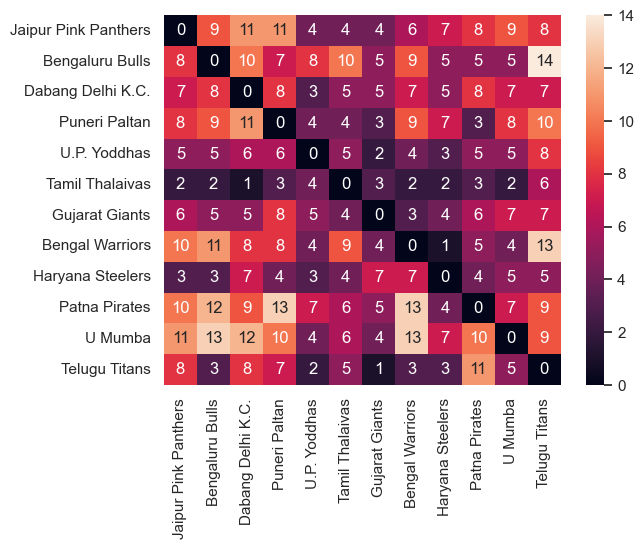

In [89]:
sns.heatmap(fixtures, annot=True);

##### Conclusion
With the above heatmap we can observe:
* Bengaluru Bulls has won 14 out of 17 mathces against Telugu Titans.
* Bengal Warriors has won 13 out of 16 matches against Telugu Titans.
* U.P. Yoddhas has won 8 out of 10 mathces against Telugu Titans.
* Gujurat Giants has won 7 out of 8 matches against Telugu Titans.
* Haryana Steelers has won 7 out of 8 matches against Bengal Warriors.
* Patna Pirates has won 12 out of 17 matches against Bengaluru Bulls.
* Patna Pirates has won 13 out of 16 matches against Puneri Paltan.
* Patna Pirates has won 13 out of 18 matches against Bengal Warriors.
* U Mumba has won 13 out of 18 matches against Bengaluru Bulls.
* U Mumba has won 13 out of 17 matches against Bengal Warriors.


### Question 7
For each season, which raider has the best do-or-die points to total raid points ratio?

In [35]:
df7=players_data.copy()
df7['ratio']=df7['do_or_die_raid_points']/df7['raid_points']

#to remove zero division errors
df7.dropna(inplace=True)
mean_raids=df7['successful_raids'].mean()

#to remove outliers, some raiders may have very less raids hence high ratio
raider_data=df7[['season', 'player_id', 'player_name', 'ratio']].loc[df7['successful_raids']>mean_raids, :]

In [36]:
#find max ratio indexes and extract data
idx=raider_data.groupby('season')['ratio'].idxmax()
raider_data.loc[idx]

,season,player_id,player_name,ratio
1348,Season 1,85,Rajesh Mondal,0.256410
1212,Season 2,94,Rishank Devadiga,0.568182
1098,Season 3,264,Selvamani K,0.657895
991,Season 4,264,Selvamani K,0.600000
815,Season 5,174,Deepak Kumar Dahiya,0.500000
651,Season 6,2028,Abhishek Singh,0.382979
440,Season 7,3241,Surender Gill,0.380282
234,Season 8,3097,Ajinkya Pawar,0.388889
7,Season 9,757,Sachin,0.380682


##### Conclusion
If a player has ratio as 0.6. Then it means that the player has scored 60% of his total raid points from do-or-die raids.
These players are also called Do-or-Die specialists as they score majority of their points from do-or-die raids.

### Question 8
For each season, what is the longest winning streak and by which team?

In [70]:
df8=match_data.copy()
seasons=match_data['season'].unique()
streak={}

for season in seasons:
    season_data=df8.loc[df8['season']==season]
    season_data=season_data.sort_values('game_id') 
    team_dict=defaultdict(lambda : 0)
    max_streak=0
    max_team=''
    for index, row in season_data.iterrows():
        team1=row['team1_name']
        team2=row['team2_name']
        winning=row['winning_team_name']
        if team1==winning:
            team_dict[team1]+=1
            team_dict[team2]=0
            if team_dict[team1]>max_streak:
                max_streak=team_dict[team1]
                max_team=team1
        elif team2==winning:
            team_dict[team2]+=1
            team_dict[team1]=0
            if team_dict[team2]>max_streak:
                max_streak=team_dict[team2]
                max_team=team2
    streak[season]=[max_streak, max_team]


In [71]:
streak

{'Season 9': [7, 'Jaipur Pink Panthers'],
 'Season 8': [7, 'Patna Pirates'],
 'Season 7': [7, 'Dabang Delhi K.C.'],
 'Season 6': [8, 'Gujarat Giants'],
 'Season 5': [7, 'Gujarat Giants'],
 'Season 4': [7, 'Telugu Titans'],
 'Season 3': [11, 'U Mumba'],
 'Season 2': [8, 'U Mumba'],
 'Season 1': [7, 'Jaipur Pink Panthers']}

### Question 9
What is the impact on the average point per match of a player when they play for a different team?

In [5]:
df9=players_data[['season', 'player_name', 'team_full_name', 'total_points', 'match_played']].copy()
df9['points_per_match']=df9['total_points']/df9['match_played']
players=df9['player_name'].unique()
result=pd.DataFrame(index=players, columns=['Average Change In Points Per Match', 'Changed'])
for player in players:
    player_df=df9.loc[df9['player_name']==player]
    seasons=player_df['season'].sort_values()
    changed=0
    sum=0
    for i, season in enumerate(seasons):
        if i==0:
            continue
        if player_df.loc[player_df['season']==season, 'team_full_name'].iloc[0] != player_df.loc[player_df['season']==seasons.iloc[i-1], 'team_full_name'].iloc[0]:
            changed+=1
            sum+=player_df.loc[player_df['season']==season, 'points_per_match'].iloc[0]-player_df.loc[player_df['season']==seasons.iloc[i-1], 'points_per_match'].iloc[0]
    if changed>0:
        result.loc[player, 'Average Change In Points Per Match']=sum/changed
        result.loc[player, 'Changed']=changed
    

result.dropna(inplace=True)
result.sort_values('Changed').head(10)


,Average Change In Points Per Match,Changed
Arjun Deshwal,6.602871,1
Vijay,-0.658009,1
Athul M S,0.274854,1
Vishal,1.270833,1
Meraj Sheykh,1.928571,1
Vikas kale,0.084416,1
Monu,-2.309524,1
C.Arun,0.727273,1
Pankaj,1.454545,1
Vineet Sharma,-0.583333,1


In [6]:
result.sort_values('Changed', ascending=False).head(20)

,Average Change In Points Per Match,Changed
Dharmaraj Cheralathan,-0.611111,6
Surjeet Singh,-0.678344,5
Sandeep Narwal,-0.209524,5
Monu Goyat,-0.309231,5
Vinod Kumar,-0.288889,5
Ravinder Pahal,-0.579644,5
Vishal Mane,0.055822,5
Hadi Oshtorak,-0.094762,5
Deepak Narwal,-0.373333,5
Manjeet Chhillar,-0.571546,4


In [17]:
result.loc[(result['Changed']>2) & (result['Average Change In Points Per Match']>1)]

,Average Change In Points Per Match,Changed
Shrikant Jadhav,2.078344,3
Chandran Ranjit,1.431261,4
K. Prapanjan,1.737762,3
Sukesh Hegde,1.053241,3


In [18]:
result.loc[(result['Changed']>2) & (result['Average Change In Points Per Match']<-1)]

,Average Change In Points Per Match,Changed
Rahul Chaudhari,-1.47619,3
Rohit Kumar,-2.234545,3
Abolfazel Maghsodlo,-1.368421,3
Rajesh Narwal,-1.659722,3


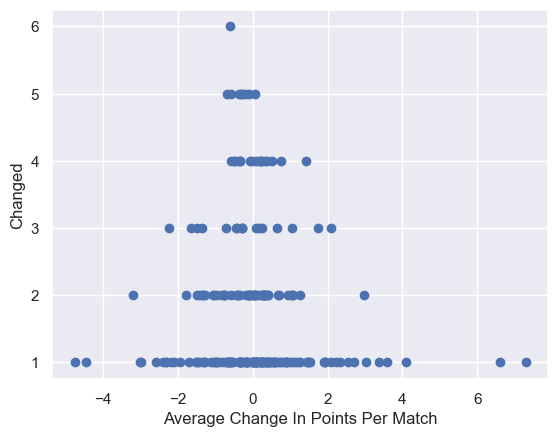

In [16]:
fig, ax=plt.subplots()
ax.scatter(result['Average Change In Points Per Match'], result['Changed'])
ax.set_xlabel('Average Change In Points Per Match')
ax.set_ylabel('Changed');

##### Conclusion
The above graphs and dataframes show that the distribution of 'Average Change In Points Per Match' is almost symmetric around 0. This means that there are as many players which have performed worse after changing teams as there are players who have performed better after changing teams.
Players performing better:
* Shrikant Jadhav	
* Chandran Ranjit	
* K. Prapanjan	
* Sukesh Hegde

Players performing worse:
* Rahul Chaudhari	
* Rohit Kumar
* Abolfazel Maghsodlo	
* Rajesh Narwal

### Question 10
Which team retaines their squads the most on a seasonal basis?

In [64]:
df10=players_data[['player_name', 'team_full_name', 'season']].copy()
seasons=match_data['season'].unique()[::-1]
seasonal_changes=pd.DataFrame(index=df10['team_full_name'].unique(), columns=seasons[1:])
squad={}

for i, season in enumerate(seasons):
    season_data=df10.loc[df10['season']==season].copy()
    season_data.set_index('team_full_name', inplace=True)
    teams=season_data.index.unique()
    squad[season]={}
    for team in teams:
        players=season_data.loc[team, 'player_name']
        squad[season][team]=set(players)
        if season=='Season 1':
            continue
        if team in squad[seasons[i-1]]:
            changes=squad[season][team].intersection(squad[seasons[i-1]][team])
            seasonal_changes.loc[team, season]=len(changes)

seasonal_changes=seasonal_changes.apply(pd.to_numeric)
seasonal_changes 

,Season 2,Season 3,Season 4,Season 5,Season 6,Season 7,Season 8,Season 9
Jaipur Pink Panthers,9.0,11.0,4.0,2.0,3,7,6,3
Bengaluru Bulls,8.0,3.0,4.0,1.0,3,9,5,6
Dabang Delhi K.C.,7.0,7.0,3.0,1.0,2,7,3,4
Tamil Thalaivas,NaN,NaN,NaN,NaN,4,5,0,8
Bengal Warriors,9.0,10.0,4.0,1.0,6,6,6,5
U.P. Yoddhas,NaN,NaN,NaN,NaN,3,6,4,9
Gujarat Giants,NaN,NaN,NaN,NaN,4,7,2,3
Patna Pirates,7.0,7.0,3.0,1.0,2,4,1,7
Haryana Steelers,NaN,NaN,NaN,NaN,3,6,1,2
Puneri Paltan,9.0,5.0,3.0,0.0,7,5,4,8


In [65]:
seasonal_changes.idxmax()

Season 2                 U Mumba
Season 3                 U Mumba
Season 4                 U Mumba
Season 5           Telugu Titans
Season 6           Puneri Paltan
Season 7         Bengaluru Bulls
Season 8    Jaipur Pink Panthers
Season 9            U.P. Yoddhas
dtype: object

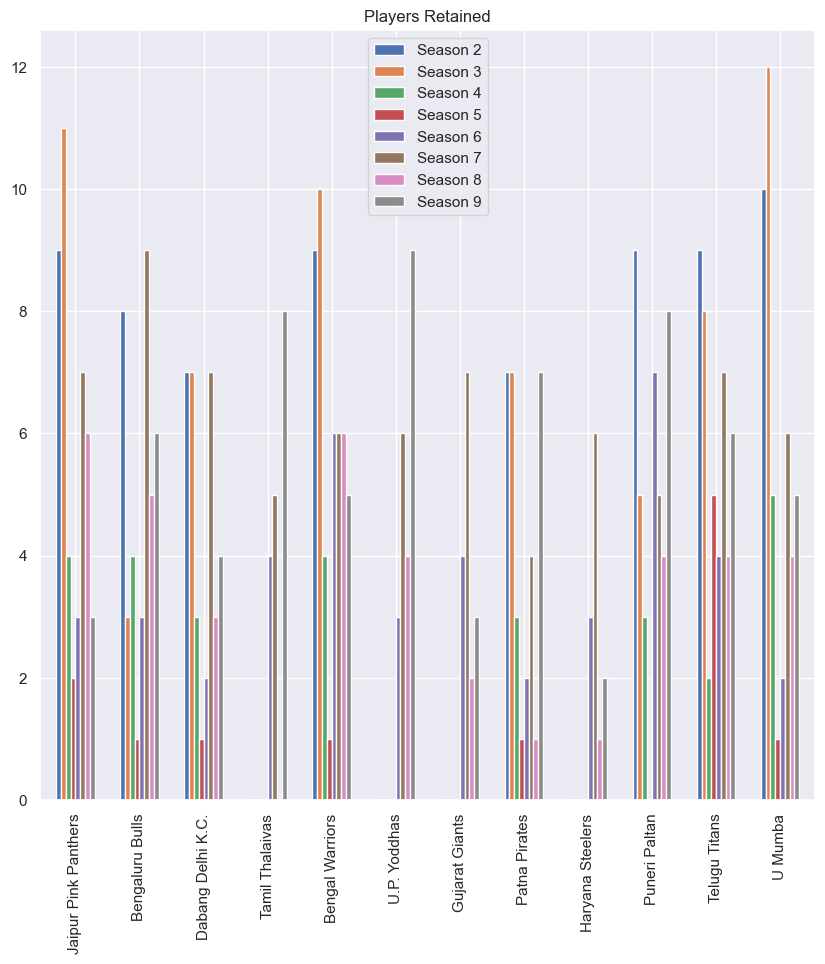

In [76]:
ax=seasonal_changes.plot.bar(width=0.6)
fig=ax.get_figure()
fig.set_size_inches(10, 10)
ax.set_title('Players Retained');